In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use( 'seaborn-v0_8-dark-palette')

In [4]:
X_data = []
Y_data = []

for i in range(100):
    point = np.random.randint(-25, 25, 2)
    X_data.append(point)
    Y_data.append(np.ones(1))
    
for i in range(100):
    point = np.random.randint(26, 50, 2)
    X_data.append(point) 
    Y_data.append(np.zeros(1))

In [5]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)

In [6]:
Y_data

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [7]:
X_data.shape, Y_data.shape

((200, 2), (200, 1))

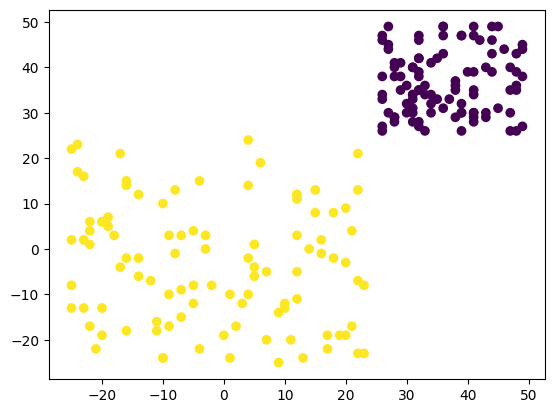

In [8]:
plt.scatter(X_data[:,0], X_data[:,1],c=Y_data)

In [9]:
from sklearn.utils import shuffle

X_data, Y_data = shuffle(X_data, Y_data, random_state=10)
split = 0.8

X_train = X_data[:int(split* X_data.shape[0]), :]
Y_train = Y_data[:int(split* Y_data.shape[0]), :]

X_test = X_data[int(split* X_data.shape[0]):, :]
Y_test = Y_data[int(split* Y_data.shape[0]):, :]

In [10]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((160, 2), (40, 2), (160, 1), (40, 1))

In [11]:
def distance_formula(p1,p2):
    return((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [12]:
distance_formula((2,0),(2,1))

1.0

In [13]:
class KNN:
    def __init__(self,k):
        self.k = k
        
    def data(self, X_data,Y_data):
        self.X = X_data
        self.Y = Y_data
    
    def predict(self, point):
        dist = []
        for i in range (self.X.shape[0]):
            dist.append((distance_formula(point, self.X[i]), i))
        dist = sorted(dist)
        distance = dist[:self.k]
        classes = []
        
        for distance, i in distance:
            classes.append(self.Y[i])
        
        unique_class, count = np.unique(classes, return_counts=True)
        
        max_class = np.argmax(count)
        
        print(f'Class: {unique_class[max_class]}, prob: {count[max_class]/self.k}')
        
        return unique_class[max_class], count[max_class]/self.k

In [14]:
knn = KNN(5)
knn.data( X_train, Y_train)

In [15]:
knn.predict((-30, 40))

Class: 1.0, prob: 1.0


(1.0, 1.0)

In [16]:
corr = 0
for i in range(X_test.shape[0]):
    pred = knn.predict(X_test[i])
    print(pred)
    if pred[0] == Y_test[i]:
        corr += 1

Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 0.0, prob: 1.0
(0.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0, prob: 1.0
(1.0, 1.0)
Class: 1.0

In [17]:
corr/X_test.shape[0]

1.0